In [8]:
import requests

# Configura tu token de acceso
access_token = 'EAALIscrMcqQBOx6HSxU6nadG2pQtthtDNxsGHwq5Nw9FZCD591y86VV3j8PeVUKj4RoreUqaxYoo0SZAAi9ELCYZAas4njilgQIcaQpF7Asgo27tilFeg7HS2d1ZCIr0mHIIPID5rwnI11RnZAKFYrKZBRXhhMFZA4MY0dbx6ba6JiVl1PZAR43srHbzZC1kZD'

# Endpoint para listar cuentas publicitarias
url = 'https://graph.facebook.com/v14.0/me/adaccounts'

# Parámetros de la solicitud
params = {
    'access_token': access_token,
    'fields': 'account_id,name'
}

# Realiza la solicitud GET a la API
response = requests.get(url, params=params)

# Manejo de la respuesta
if response.status_code == 200:
    ad_accounts = response.json().get('data', [])
    for ad_account in ad_accounts:
        print(f"ID: act_{ad_account['account_id']}, Nombre: {ad_account['name']}")
else:
    print(f'Error: {response.status_code}')
    print(response.text)


ID: act_417027435793204, Nombre: Jorge Delgado


In [10]:
pip install facebook_business


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 653.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.3 MB 2.0 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.3 MB 3.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.3 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.3 MB 16.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.0/6.3 MB 13.0 MB/s eta 0:00:01
   ---------- ----------------------------- 1.7/6.3 MB 13.8 MB/s eta 0:00:01
  

In [16]:
from facebook_business.api import FacebookAdsApi
from facebook_business.adobjects.adaccount import AdAccount
from facebook_business.adobjects.adsinsights import AdsInsights
import json
import csv

# Configura las credenciales de la aplicación
app_id = '783615890584228'
app_secret = '3773abc47d78f84a090cfb0abdce677e'
access_token = 'EAALIscrMcqQBOx6HSxU6nadG2pQtthtDNxsGHwq5Nw9FZCD591y86VV3j8PeVUKj4RoreUqaxYoo0SZAAi9ELCYZAas4njilgQIcaQpF7Asgo27tilFeg7HS2d1ZCIr0mHIIPID5rwnI11RnZAKFYrKZBRXhhMFZA4MY0dbx6ba6JiVl1PZAR43srHbzZC1kZD'
id_cuenta_anuncio = 'act_417027435793204'

# Configura la API de Facebook Ads
FacebookAdsApi.init(app_id, app_secret, access_token)

# Define el objeto de cuenta de anuncio
cuenta_anuncio = AdAccount(id_cuenta_anuncio)

# Parámetros de consulta
params = {
    'time_range': {'since': '2024-01-01', 'until': '2024-06-30'},
    'level': 'campaign',
    'fields': [
        AdsInsights.Field.campaign_id,
        AdsInsights.Field.campaign_name,
        AdsInsights.Field.impressions,
        AdsInsights.Field.clicks,
        AdsInsights.Field.spend,
    ],
}

# Obtener insights
insights = cuenta_anuncio.get_insights(params=params)

# Convertir resultados a lista de diccionarios
data = [insight.export_all_data() for insight in insights]

# Guardar como JSON
with open('insights.json', 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, indent=4)

# Guardar como CSV
with open('insights.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)

print("Datos guardados en 'insights.json' y 'insights.csv'.")



Datos guardados en 'insights.json' y 'insights.csv'.


In [17]:
from facebook_business.api import FacebookAdsApi
from facebook_business.adobjects.adaccount import AdAccount
from facebook_business.adobjects.adsinsights import AdsInsights
import json
import csv

# Configura las credenciales de la aplicación
app_id = '783615890584228'
app_secret = '3773abc47d78f84a090cfb0abdce677e'
access_token = 'EAALIscrMcqQBOx6HSxU6nadG2pQtthtDNxsGHwq5Nw9FZCD591y86VV3j8PeVUKj4RoreUqaxYoo0SZAAi9ELCYZAas4njilgQIcaQpF7Asgo27tilFeg7HS2d1ZCIr0mHIIPID5rwnI11RnZAKFYrKZBRXhhMFZA4MY0dbx6ba6JiVl1PZAR43srHbzZC1kZD'
id_cuenta_anuncio = 'act_417027435793204'

# Configura la API de Facebook Ads
FacebookAdsApi.init(app_id, app_secret, access_token)

# Define el objeto de cuenta de anuncio
cuenta_anuncio = AdAccount(id_cuenta_anuncio)

# Parámetros de consulta
params = {
    'time_range': {'since': '2024-01-01', 'until': '2024-06-30'},
    'level': 'campaign',
    'fields': [
        AdsInsights.Field.campaign_id,
        AdsInsights.Field.campaign_name,
        AdsInsights.Field.impressions,
        AdsInsights.Field.clicks,
        AdsInsights.Field.spend,
        AdsInsights.Field.reach,
        AdsInsights.Field.frequency,
        AdsInsights.Field.cpm,
        AdsInsights.Field.cpc,
        AdsInsights.Field.ctr,
        AdsInsights.Field.actions,
    ],
}

# Obtener insights
insights = cuenta_anuncio.get_insights(params=params)

# Convertir resultados a lista de diccionarios
data = [insight.export_all_data() for insight in insights]

# Guardar como JSON
with open('insights.json', 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, indent=4)

# Guardar como CSV
with open('insights.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)

print("Datos guardados en 'insights.json' y 'insights.csv'.")


Datos guardados en 'insights.json' y 'insights.csv'.


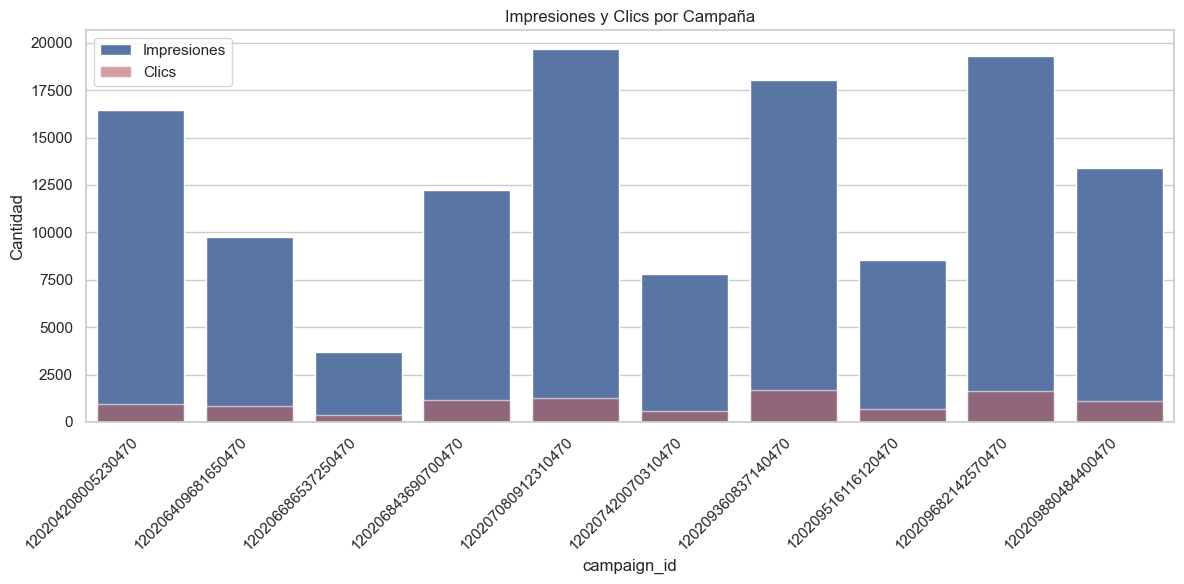

In [21]:
# Gráfico de barras para impresiones y clics por campaña
plt.figure(figsize=(12, 6))
sns.barplot(x='campaign_id', y='impressions', data=data, label='Impresiones', color='b')
sns.barplot(x='campaign_id', y='clicks', data=data, label='Clics', color='r', alpha=0.6)

plt.xticks(rotation=45, ha='right')
plt.title('Impresiones y Clics por Campaña')
plt.xlabel('campaign_id')
plt.ylabel('Cantidad')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
	campaign_id	campaign_name
1	120204208005230470	Publicación: "🎶🎉✨Pasa los mejores carnavales en HuaytaWasy 🎉🌥🎊"
2	120206409681650470	Publicación: "🔴Lanzamos nuestros paquetes para Semana Santa ✝️..."
3	120206686537250470	Publicación: "🇵🇪 Se acerca la Semana Santa 🌄 . Disfruta de..."
4	120206843690700470	Publicación: "🔴Lanzamos nuestros paquetes para Semana Santa ✝️..."
5	120207080912310470	[20/03/2024] Promoción de 
6	120207420070310470	Publicación: "✨️✨️✨️ULTIMO BUNGALOW DE 5 Y 7 PERSONAS, PRECIOS..."
7	120209360837140470	Publicación: "🎊 SE VIENE LA FIESTA DE SAN JUAN DEL 22 AL 24 DE..."
8	120209516116120470	Publicación: "🔴ULTIMAS LOCACIONES DISPONIBLES, SE ACABA LA..."
9	120209682142570470	Publicación: "🔴ULTIMAS LOCACIONES DISPONIBLES, SE ACABA LA..."
10	120209880484400470	Publicación: "🔴ULTIMAS LOCACIONES DISPONIBLES, SE ACABA LA..."

C:\Users\51958\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\51958\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\51958\AppData\Local\Temp\ipykernel_2356\1500735575.py:9: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  plt.tight_layout()
C:\Users\51958\AppData\Local\Temp\ipykernel_2356\1500735575.py:9: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  plt.tight_layout()
C:\Users\51958\AppData\Local\Temp\ipykernel_2356\1500735575.py:9: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  plt.t

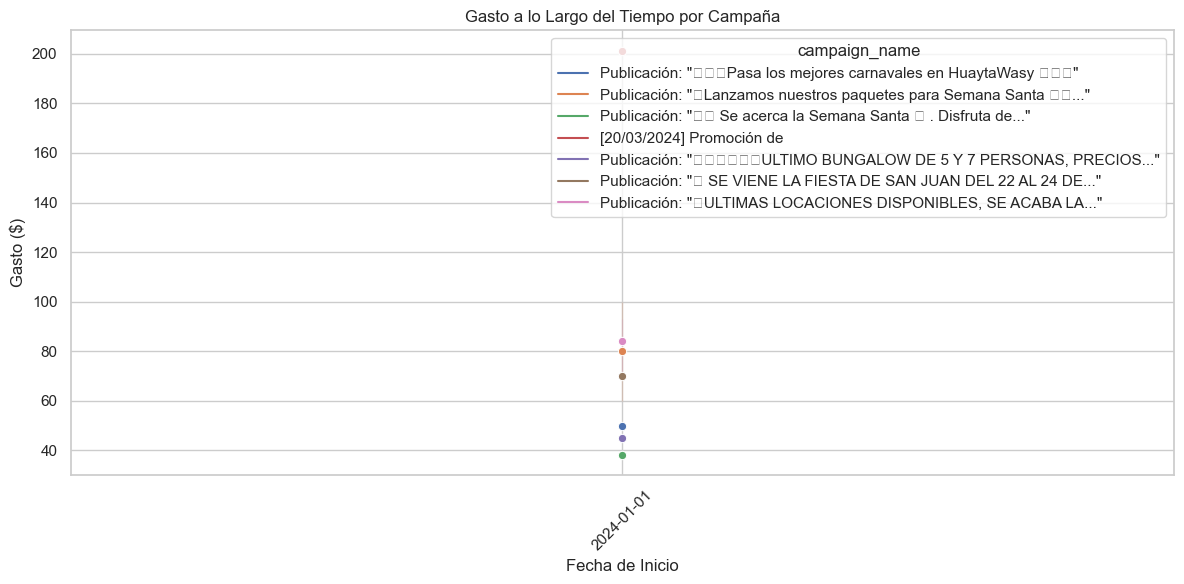

In [23]:
# Gráfico de líneas para gasto a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date_start', y='spend', hue='campaign_name', marker='o')

plt.title('Gasto a lo Largo del Tiempo por Campaña')
plt.xlabel('Fecha de Inicio')
plt.ylabel('Gasto ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Campaña 2024

                 campaign_name
1	Publicación: "🎶🎉✨Pasa los mejores carnavales en HuaytaWasy 🎉🌥🎊"
2	Publicación: "🔴Lanzamos nuestros paquetes para Semana Santa ✝️..."
3	Publicación: "🇵🇪 Se acerca la Semana Santa 🌄 . Disfruta de..."
4	Publicación: "🔴Lanzamos nuestros paquetes para Semana Santa ✝️..."
5	[20/03/2024] Promoción de 
6	Publicación: "✨️✨️✨️ULTIMO BUNGALOW DE 5 Y 7 PERSONAS, PRECIOS..."
7	Publicación: "🎊 SE VIENE LA FIESTA DE SAN JUAN DEL 22 AL 24 DE..."
8	Publicación: "🔴ULTIMAS LOCACIONES DISPONIBLES, SE ACABA LA..."
9	Publicación: "🔴ULTIMAS LOCACIONES DISPONIBLES, SE ACABA LA..."
10	Publicación: "🔴ULTIMAS LOCACIONES DISPONIBLES, SE ACABA LA..."